In [1]:
#Dataframe Preparation
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [120]:
#Removing when wards were added in
dataframe=pandas.read_csv('housing_data.csv')
dataframe = dataframe[dataframe['lotto_entries'] >= 0]
dataframe = dataframe[dataframe['is_owned'] == False]
dataframe.drop('id', axis=1, inplace=True)
dataframe.drop('owner_name_hash', axis=1, inplace=True)
dataframe.drop('owner_name_has_space', axis=1, inplace=True)
dataframe.drop('first_seen', axis=1, inplace=True)
dataframe.drop('price', axis=1, inplace=True)
dataframe = dataframe[dataframe['lotto_phase'] < 3]
dataframe.loc[dataframe["lotto_phase"] == 2, "lotto_phase_until"] = 0

In [121]:
dataframe

,world,district,ward_number,plot_number,house_size,lotto_entries,last_seen,is_owned,lotto_phase,lotto_phase_until
4319,Durandal,Shirogane,21,41,SMALL,17.0,1.719315e+09,False,1.0,1.719328e+09
4322,Durandal,Shirogane,13,11,SMALL,25.0,1.719329e+09,False,2.0,0.000000e+00
4907,Titan,Mist,21,56,SMALL,9.0,1.719243e+09,False,1.0,1.719328e+09
5173,Asura,The Goblet,29,13,LARGE,96.0,1.719328e+09,False,2.0,0.000000e+00
5507,Gungnir,Shirogane,9,47,SMALL,6.0,1.719154e+09,False,1.0,1.719328e+09
...,...,...,...,...,...,...,...,...,...,...
2513885,Tonberry,Empyreum,1,44,SMALL,0.0,1.716998e+09,False,1.0,1.706886e+09
2513887,Tonberry,Empyreum,1,45,SMALL,0.0,1.719382e+09,False,1.0,1.706886e+09
2584036,Kujata,Empyreum,1,46,SMALL,0.0,1.719359e+09,False,1.0,1.710774e+09
2584038,Kujata,Empyreum,1,50,SMALL,0.0,1.711554e+09,False,1.0,1.710774e+09


In [122]:
dataframe = dataframe[~dataframe['last_seen'].between(1673802000, 1676307600, inclusive='both')]
dataframe

,world,district,ward_number,plot_number,house_size,lotto_entries,last_seen,is_owned,lotto_phase,lotto_phase_until
4319,Durandal,Shirogane,21,41,SMALL,17.0,1.719315e+09,False,1.0,1.719328e+09
4322,Durandal,Shirogane,13,11,SMALL,25.0,1.719329e+09,False,2.0,0.000000e+00
4907,Titan,Mist,21,56,SMALL,9.0,1.719243e+09,False,1.0,1.719328e+09
5173,Asura,The Goblet,29,13,LARGE,96.0,1.719328e+09,False,2.0,0.000000e+00
5507,Gungnir,Shirogane,9,47,SMALL,6.0,1.719154e+09,False,1.0,1.719328e+09
...,...,...,...,...,...,...,...,...,...,...
2513885,Tonberry,Empyreum,1,44,SMALL,0.0,1.716998e+09,False,1.0,1.706886e+09
2513887,Tonberry,Empyreum,1,45,SMALL,0.0,1.719382e+09,False,1.0,1.706886e+09
2584036,Kujata,Empyreum,1,46,SMALL,0.0,1.719359e+09,False,1.0,1.710774e+09
2584038,Kujata,Empyreum,1,50,SMALL,0.0,1.711554e+09,False,1.0,1.710774e+09


In [123]:
dataframe

,world,district,ward_number,plot_number,house_size,lotto_entries,last_seen,is_owned,lotto_phase,lotto_phase_until
4319,Durandal,Shirogane,21,41,SMALL,17.0,1.719315e+09,False,1.0,1.719328e+09
4322,Durandal,Shirogane,13,11,SMALL,25.0,1.719329e+09,False,2.0,0.000000e+00
4907,Titan,Mist,21,56,SMALL,9.0,1.719243e+09,False,1.0,1.719328e+09
5173,Asura,The Goblet,29,13,LARGE,96.0,1.719328e+09,False,2.0,0.000000e+00
5507,Gungnir,Shirogane,9,47,SMALL,6.0,1.719154e+09,False,1.0,1.719328e+09
...,...,...,...,...,...,...,...,...,...,...
2513885,Tonberry,Empyreum,1,44,SMALL,0.0,1.716998e+09,False,1.0,1.706886e+09
2513887,Tonberry,Empyreum,1,45,SMALL,0.0,1.719382e+09,False,1.0,1.706886e+09
2584036,Kujata,Empyreum,1,46,SMALL,0.0,1.719359e+09,False,1.0,1.710774e+09
2584038,Kujata,Empyreum,1,50,SMALL,0.0,1.711554e+09,False,1.0,1.710774e+09


In [124]:
dataframe['Difference'] = dataframe["lotto_phase_until"] - dataframe["last_seen"]
dataframe.loc[dataframe["lotto_phase"] == 2, "Difference"] = 0
dataframe = dataframe[dataframe['Difference'] < 43200]
dataframe = dataframe[dataframe['Difference'] > -1000]
dataframe.drop('last_seen', axis=1, inplace=True)
dataframe.drop('lotto_phase_until', axis=1, inplace=True)
dataframe.drop('lotto_phase', axis=1, inplace=True)
dataframe.drop('Difference', axis=1, inplace=True)

C:\Users\micro\AppData\Local\Temp\ipykernel_17872\1657682875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Difference'] = dataframe["lotto_phase_until"] - dataframe["last_seen"]


In [125]:
dataframe.drop(dataframe[dataframe['world'] == 'Cerberus'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Louisoix'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Moogle'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Omega'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Phantom'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Ragnarok'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Sagittarius'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Spriggan'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Alpha'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Lich'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Odin'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Phoenix'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Raiden'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Shiva'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Twintania'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Zodiark'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Bismarck'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Ravana'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Sephirot'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Sophia'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Zurvan'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Aegis'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Atomos'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Carbuncle'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Garuda'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Gungnir'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Kujata'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Tonberry'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Typhon'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Alexander'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Bahamut'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Durandal'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Fenrir'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Ifrit'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Ridill'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Tiamat'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Ultima'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Anima'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Asura'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Chocobo'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Hades'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Ixion'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Masamune'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Pandaemonium'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Titan'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Belias'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Mandragora'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Ramuh'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Shinryu'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Unicorn'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Valefor'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Yojimbo'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Zeromus'].index, inplace=True)
#Drop all of Dynamis Servers due to their limited data and lottery entries
dataframe.drop(dataframe[dataframe['world'] == 'Golem'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Halicarnassus'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Kraken'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Maduin'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Marilith'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Rafflesia'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Seraph'].index, inplace=True)
dataframe.drop(dataframe[dataframe['world'] == 'Cuchulainn'].index, inplace=True)
dataframe['house_size'].replace('SMALL', '1', inplace=True)
dataframe['house_size'].replace('MEDIUM', '2', inplace=True)
dataframe['house_size'].replace('LARGE', '3', inplace=True)
dataframe['house_size'] = dataframe['house_size'].astype(int)

C:\Users\micro\AppData\Local\Temp\ipykernel_17872\3766877393.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['house_size'].replace('SMALL', '1', inplace=True)
C:\Users\micro\AppData\Local\Temp\ipykernel_17872\3766877393.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [126]:
dataframe.drop('is_owned', axis=1, inplace=True)

In [118]:
dataframe.to_csv('cleaned_housing_data.csv', mode='w+')

In [7]:
dataframe = pandas.read_csv('updated_housing_data.csv')
dataframe

,world,district,ward_number,plot_number,house_size,lotto_entries
0,Goblin,The Goblet,21,8,2,29
1,Exodus,Shirogane,7,6,1,6
2,Goblin,Shirogane,14,49,2,93
3,Lamia,Mist,8,59,2,62
4,Malboro,The Lavender Beds,30,55,1,10
...,...,...,...,...,...,...
85401,Lamia,The Goblet,24,8,2,4
85402,Behemoth,Empyreum,2,50,1,1
85403,Behemoth,Empyreum,6,39,1,1
85404,Behemoth,Empyreum,6,34,1,1


In [59]:
dataframe = pandas.read_csv('cleaned_housing_data.csv')
dataframe

,Unnamed: 0,world,district,ward_number,plot_number,house_size,lotto_entries,is_owned
0,4319,Durandal,Shirogane,21,41,SMALL,17.0,False
1,4322,Durandal,Shirogane,13,11,SMALL,25.0,False
2,5173,Asura,The Goblet,29,13,LARGE,96.0,False
3,5525,Ultima,Shirogane,6,22,SMALL,72.0,False
4,5963,Valefor,Empyreum,28,49,SMALL,13.0,False
...,...,...,...,...,...,...,...,...
97560,2222106,Ravana,Empyreum,1,51,MEDIUM,0.0,False
97561,2222109,Ravana,Empyreum,1,41,SMALL,0.0,False
97562,2325563,Zodiark,Empyreum,1,50,SMALL,0.0,False
97563,2469670,Twintania,Empyreum,1,59,SMALL,1.0,False


In [70]:
dataframe.drop('Unnamed: 0', axis=1, inplace=True)

In [119]:
dataframe

,world,district,ward_number,plot_number,house_size,lotto_entries,district_avg_entries,ward_avg_entries,total_entries_in_world,plot_popularity
0,Goblin,The Goblet,21,8,2,29.0,13.346405,21.801226,36110.0,0.000803
1,Exodus,Shirogane,7,6,1,6.0,22.791391,22.482856,27929.0,0.000215
2,Goblin,Shirogane,14,49,2,93.0,22.791391,21.665345,36110.0,0.002575
3,Lamia,Mist,8,59,2,62.0,21.075564,19.513425,30002.0,0.002067
4,Malboro,The Lavender Beds,30,55,1,10.0,24.330882,29.309348,33474.0,0.000299
...,...,...,...,...,...,...,...,...,...,...
52112,Diabolos,Mist,25,47,1,1.0,21.075564,2.699507,33855.0,0.000030
52113,Behemoth,Empyreum,2,50,1,1.0,16.863208,8.983986,29978.0,0.000033
52114,Behemoth,Empyreum,6,39,1,1.0,16.863208,10.177931,29978.0,0.000033
52115,Behemoth,Empyreum,6,34,1,1.0,16.863208,10.177931,29978.0,0.000033


In [8]:
dataframe["district_avg_entries"] = dataframe.groupby("district")["lotto_entries"].transform("mean")
dataframe["ward_avg_entries"] = dataframe.groupby("ward_number")["lotto_entries"].transform("mean")

In [9]:
world_total_entries = dataframe.groupby("world")["lotto_entries"].sum().rename("total_entries_in_world")
dataframe = dataframe.merge(world_total_entries, on="world")

dataframe["plot_popularity"] = (dataframe["lotto_entries"] / dataframe["total_entries_in_world"]) * 1000

In [10]:
dataframe.dtypes

world                      object
district                   object
ward_number                 int64
plot_number                 int64
house_size                  int64
lotto_entries               int64
district_avg_entries      float64
ward_avg_entries          float64
total_entries_in_world      int64
plot_popularity           float64
dtype: object

In [11]:
dataframe.describe()

,ward_number,plot_number,house_size,lotto_entries,district_avg_entries,ward_avg_entries,total_entries_in_world,plot_popularity
count,85406.000000,85406.000000,85406.000000,85406.000000,85406.000000,85406.000000,85406.000000,85406.000000
mean,18.792298,30.454746,1.398731,13.929771,13.929771,13.929771,51005.533639,0.281011
std,8.864963,17.282016,0.625228,30.110861,2.843766,5.988588,16503.791766,0.608850
min,1.000000,1.000000,1.000000,0.000000,9.509077,2.891865,32705.000000,0.000000
25%,11.000000,15.000000,1.000000,1.000000,11.719644,9.308081,38649.000000,0.025874
50%,21.000000,31.000000,1.000000,4.000000,14.751146,10.336838,48469.000000,0.073853
75%,27.000000,45.000000,2.000000,11.000000,16.211702,19.845837,52275.000000,0.210426
max,30.000000,60.000000,3.000000,580.000000,17.059052,23.927074,101397.000000,9.518204


In [12]:
dataframe

,world,district,ward_number,plot_number,house_size,lotto_entries,district_avg_entries,ward_avg_entries,total_entries_in_world,plot_popularity
0,Goblin,The Goblet,21,8,2,29,9.509077,20.167748,40905,0.708960
1,Exodus,Shirogane,7,6,1,6,16.211702,19.460965,32705,0.183458
2,Goblin,Shirogane,14,49,2,93,16.211702,19.265315,40905,2.273561
3,Lamia,Mist,8,59,2,62,14.751146,17.127459,35806,1.731553
4,Malboro,The Lavender Beds,30,55,1,10,17.059052,10.336838,38507,0.259693
...,...,...,...,...,...,...,...,...,...,...
85401,Lamia,The Goblet,24,8,2,4,9.509077,20.629242,35806,0.111713
85402,Behemoth,Empyreum,2,50,1,1,11.719644,8.716279,35555,0.028125
85403,Behemoth,Empyreum,6,39,1,1,11.719644,9.887862,35555,0.028125
85404,Behemoth,Empyreum,6,34,1,1,11.719644,9.887862,35555,0.028125


In [13]:
#One Hot Encoding on Server and District (Object Columns)
categorical_columns = dataframe.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(dataframe[categorical_columns])
one_hot_df = pandas.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pandas.concat([dataframe, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded

,ward_number,plot_number,house_size,lotto_entries,district_avg_entries,ward_avg_entries,total_entries_in_world,plot_popularity,world_Adamantoise,world_Balmung,...,world_Midgardsormr,world_Sargatanas,world_Siren,world_Ultros,world_Zalera,district_Empyreum,district_Mist,district_Shirogane,district_The Goblet,district_The Lavender Beds
0,21,8,2,29,9.509077,20.167748,40905,0.708960,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7,6,1,6,16.211702,19.460965,32705,0.183458,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14,49,2,93,16.211702,19.265315,40905,2.273561,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8,59,2,62,14.751146,17.127459,35806,1.731553,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,30,55,1,10,17.059052,10.336838,38507,0.259693,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85401,24,8,2,4,9.509077,20.629242,35806,0.111713,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
85402,2,50,1,1,11.719644,8.716279,35555,0.028125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
85403,6,39,1,1,11.719644,9.887862,35555,0.028125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
85404,6,34,1,1,11.719644,9.887862,35555,0.028125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
df_encoded.dtypes

ward_number                     int64
plot_number                     int64
house_size                      int64
lotto_entries                   int64
district_avg_entries          float64
ward_avg_entries              float64
total_entries_in_world          int64
plot_popularity               float64
world_Adamantoise             float64
world_Balmung                 float64
world_Behemoth                float64
world_Brynhildr               float64
world_Cactuar                 float64
world_Coeurl                  float64
world_Diabolos                float64
world_Excalibur               float64
world_Exodus                  float64
world_Faerie                  float64
world_Famfrit                 float64
world_Gilgamesh               float64
world_Goblin                  float64
world_Hyperion                float64
world_Jenova                  float64
world_Lamia                   float64
world_Leviathan               float64
world_Malboro                 float64
world_Mateus

In [15]:
#Machine Learning & Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
target = "lotto_entries"
X=df_encoded.drop(['lotto_entries'], axis=1)
y=df_encoded['lotto_entries']

In [135]:
X=df_encoded[["plot_popularity"]]

In [136]:
X.head()

,plot_popularity
0,0.803102
1,0.214830
2,2.575464
3,2.066529
4,0.298739


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

In [18]:
train_data = X_train.join(y_train)
train_data

,ward_number,plot_number,house_size,district_avg_entries,ward_avg_entries,total_entries_in_world,plot_popularity,world_Adamantoise,world_Balmung,world_Behemoth,...,world_Sargatanas,world_Siren,world_Ultros,world_Zalera,district_Empyreum,district_Mist,district_Shirogane,district_The Goblet,district_The Lavender Beds,lotto_entries
58777,10,44,2,14.751146,20.758859,37996,0.184230,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7
77746,25,37,2,14.751146,2.891865,48469,0.020632,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
29563,25,49,1,17.059052,2.891865,36517,0.027385,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3556,24,4,2,9.509077,20.629242,49274,0.507367,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,25
445,22,37,2,11.719644,20.514885,50740,2.207331,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50688,16,44,1,11.719644,19.845837,35555,0.056251,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
49345,21,48,1,14.751146,20.167748,48469,0.020632,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
66522,13,31,1,11.719644,18.787461,43449,0.115077,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
22156,11,51,1,16.211702,18.223783,60665,0.296711,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18


array([[<Axes: title={'center': 'ward_number'}>,
        <Axes: title={'center': 'plot_number'}>,
        <Axes: title={'center': 'house_size'}>,
        <Axes: title={'center': 'district_avg_entries'}>,
        <Axes: title={'center': 'ward_avg_entries'}>,
        <Axes: title={'center': 'total_entries_in_world'}>],
       [<Axes: title={'center': 'plot_popularity'}>,
        <Axes: title={'center': 'world_Adamantoise'}>,
        <Axes: title={'center': 'world_Balmung'}>,
        <Axes: title={'center': 'world_Behemoth'}>,
        <Axes: title={'center': 'world_Brynhildr'}>,
        <Axes: title={'center': 'world_Cactuar'}>],
       [<Axes: title={'center': 'world_Coeurl'}>,
        <Axes: title={'center': 'world_Diabolos'}>,
        <Axes: title={'center': 'world_Excalibur'}>,
        <Axes: title={'center': 'world_Exodus'}>,
        <Axes: title={'center': 'world_Faerie'}>,
        <Axes: title={'center': 'world_Famfrit'}>],
       [<Axes: title={'center': 'world_Gilgamesh'}>,
     

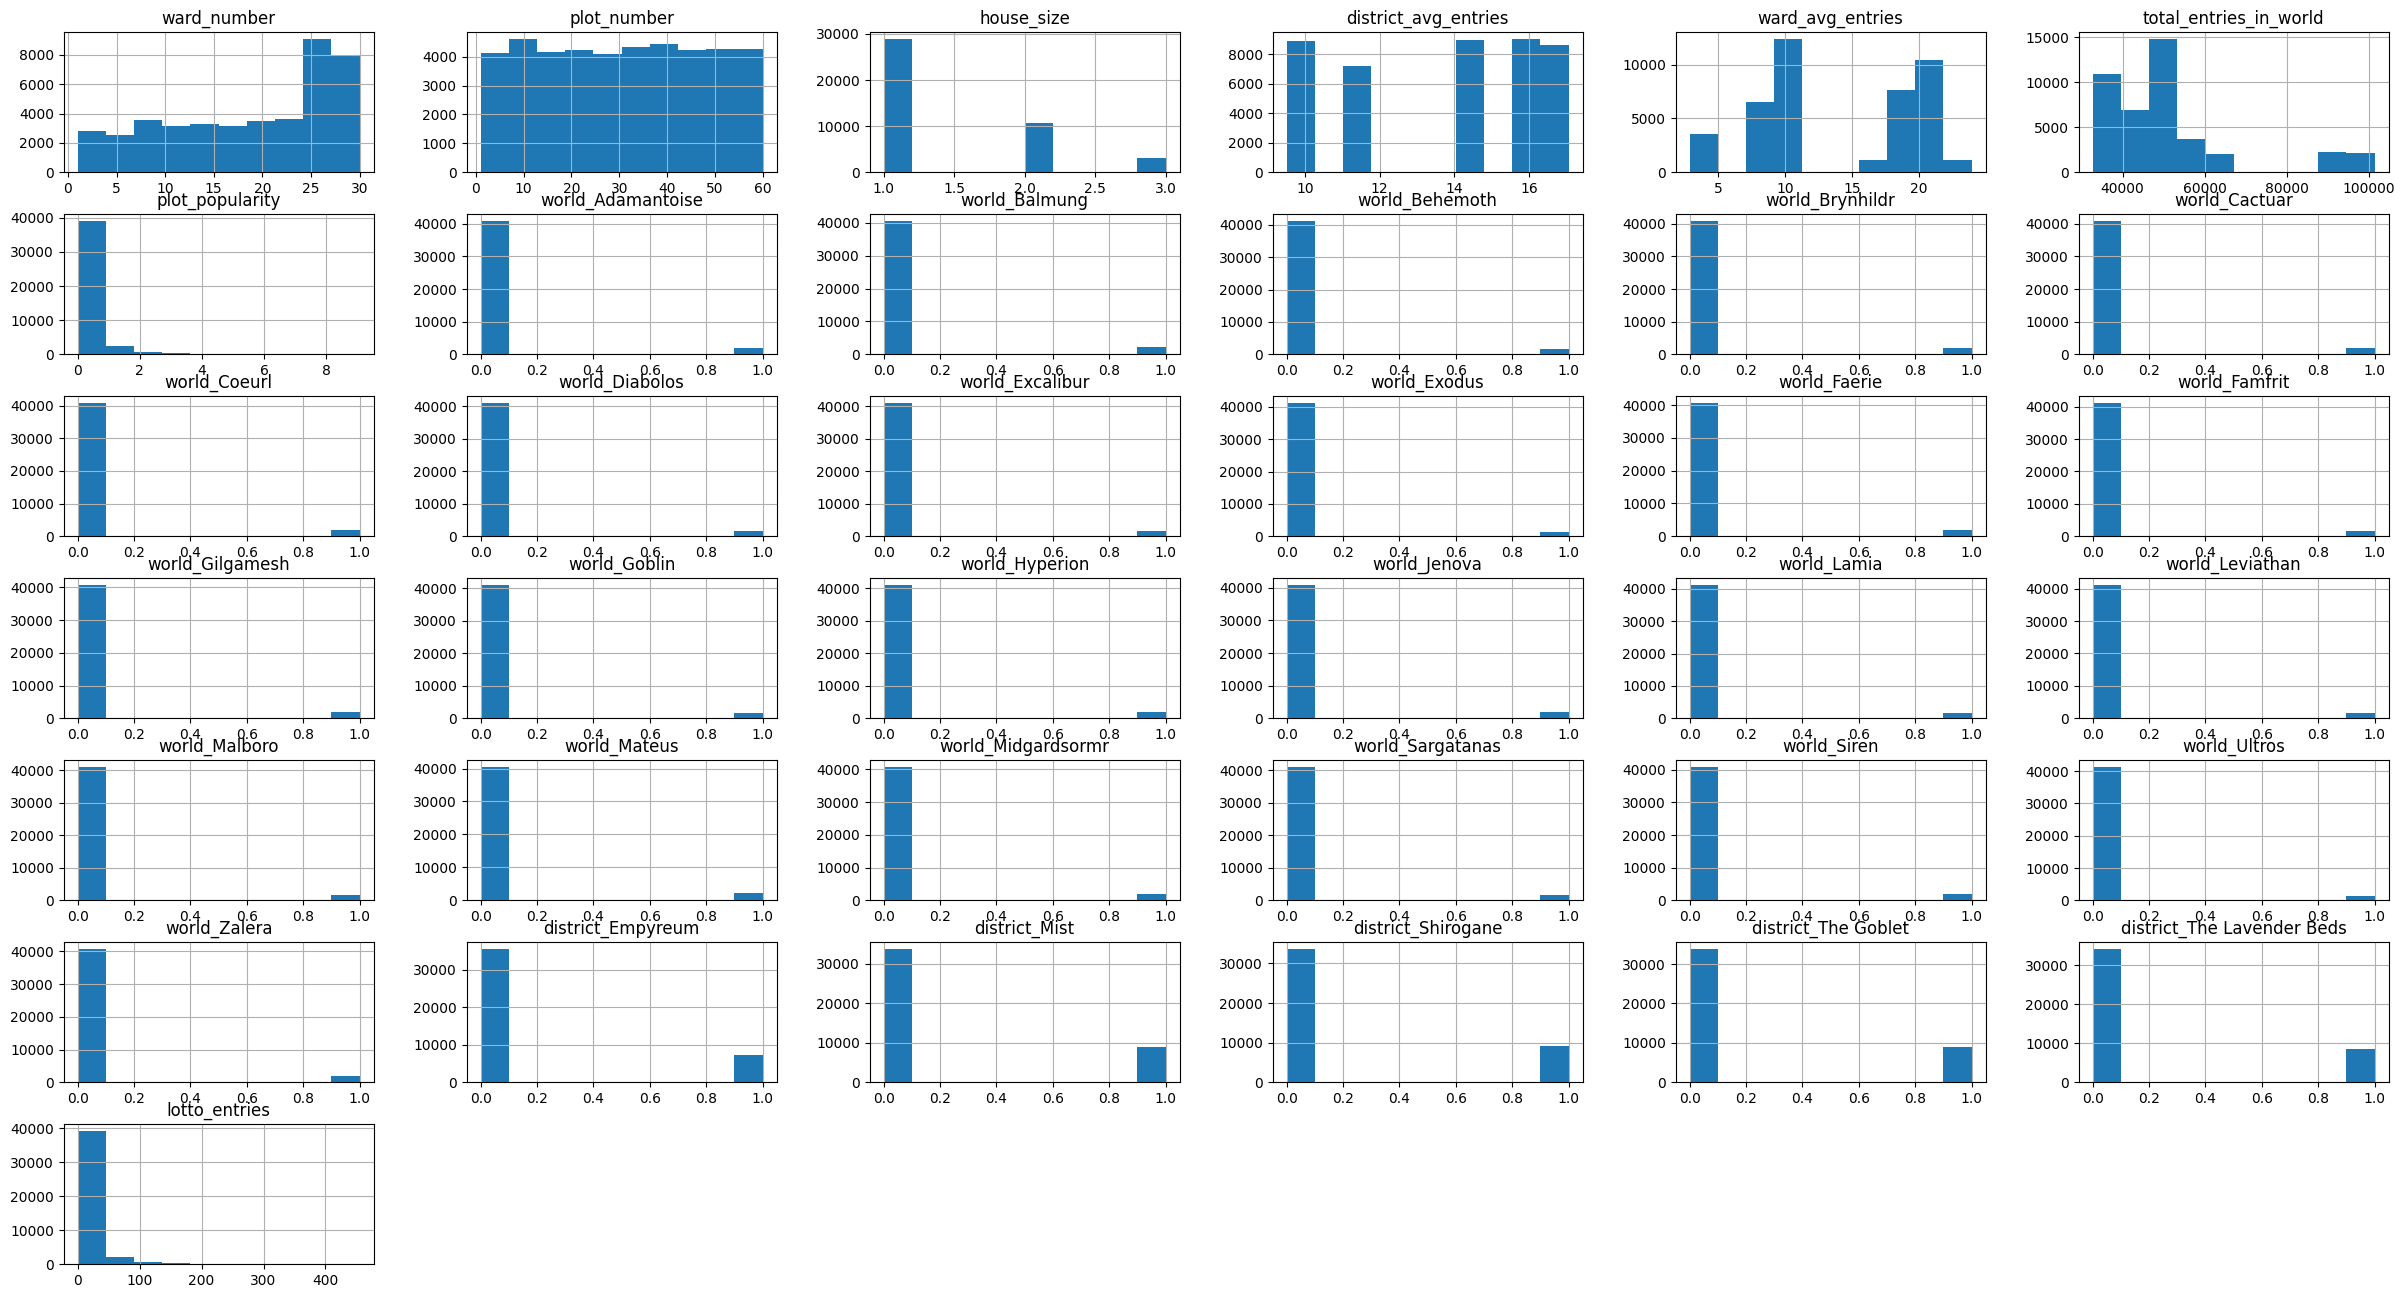

In [19]:
train_data.hist(figsize = (30,16))

In [20]:
train_data.corr()

,ward_number,plot_number,house_size,district_avg_entries,ward_avg_entries,total_entries_in_world,plot_popularity,world_Adamantoise,world_Balmung,world_Behemoth,...,world_Sargatanas,world_Siren,world_Ultros,world_Zalera,district_Empyreum,district_Mist,district_Shirogane,district_The Goblet,district_The Lavender Beds,lotto_entries
ward_number,1.000000,-0.005281,0.121667,0.004595,-0.314666,0.005829,-0.063836,0.006365,0.018793,0.013960,...,-0.005025,0.005593,0.006974,-0.002147,0.001087,-0.002697,0.003980,-0.004599,0.002328,-0.064866
plot_number,-0.005281,1.000000,-0.042106,0.013623,0.003234,0.004670,-0.030328,-0.000738,0.000728,-0.007145,...,0.018775,-0.003173,-0.006309,0.001495,0.000669,0.005763,-0.004687,-0.014329,0.012799,-0.029816
house_size,0.121667,-0.042106,1.000000,-0.044769,-0.057300,-0.071200,0.479763,0.001060,-0.043433,0.023303,...,-0.003838,-0.007999,0.035301,-0.008877,0.012901,-0.006430,-0.028508,0.038367,-0.015310,0.454102
district_avg_entries,0.004595,0.013623,-0.044769,1.000000,-0.034957,-0.034097,0.098546,-0.006278,-0.035242,0.001192,...,0.019468,-0.006184,0.010274,-0.016301,-0.348284,0.150081,0.416417,-0.794910,0.553097,0.093809
ward_avg_entries,-0.314666,0.003234,-0.057300,-0.034957,1.000000,-0.002891,0.199076,-0.001003,-0.015335,-0.007431,...,-0.001598,-0.000610,-0.005680,0.009092,0.012285,-0.002995,-0.033506,0.029165,-0.003819,0.200879
total_entries_in_world,0.005829,0.004670,-0.071200,-0.034097,-0.002891,1.000000,-0.041257,-0.086653,0.696260,-0.180718,...,-0.040699,0.041122,-0.147499,-0.023922,0.040172,-0.013907,-0.018394,0.011829,-0.016596,0.097194
plot_popularity,-0.063836,-0.030328,0.479763,0.098546,0.199076,-0.041257,1.000000,-0.000848,-0.020023,0.008216,...,-0.001051,-0.004499,0.023538,-0.013264,-0.033273,0.016853,0.042119,-0.079774,0.051784,0.955152
world_Adamantoise,0.006365,-0.000738,0.001060,-0.006278,-0.001003,-0.086653,-0.000848,1.000000,-0.047911,-0.040591,...,-0.043033,-0.045049,-0.039350,-0.046871,0.011686,-0.001819,-0.002182,-0.000982,-0.005839,-0.011382
world_Balmung,0.018793,0.000728,-0.043433,-0.035242,-0.015335,0.696260,-0.020023,-0.047911,1.000000,-0.043862,...,-0.046500,-0.048679,-0.042521,-0.050648,0.031523,-0.008546,-0.023277,0.017437,-0.014676,0.070527
world_Behemoth,0.013960,-0.007145,0.023303,0.001192,-0.007431,-0.180718,0.008216,-0.040591,-0.043862,1.000000,...,-0.039396,-0.041241,-0.036024,-0.042910,0.012564,-0.006446,0.005310,-0.007919,-0.002565,-0.019604


<Axes: >

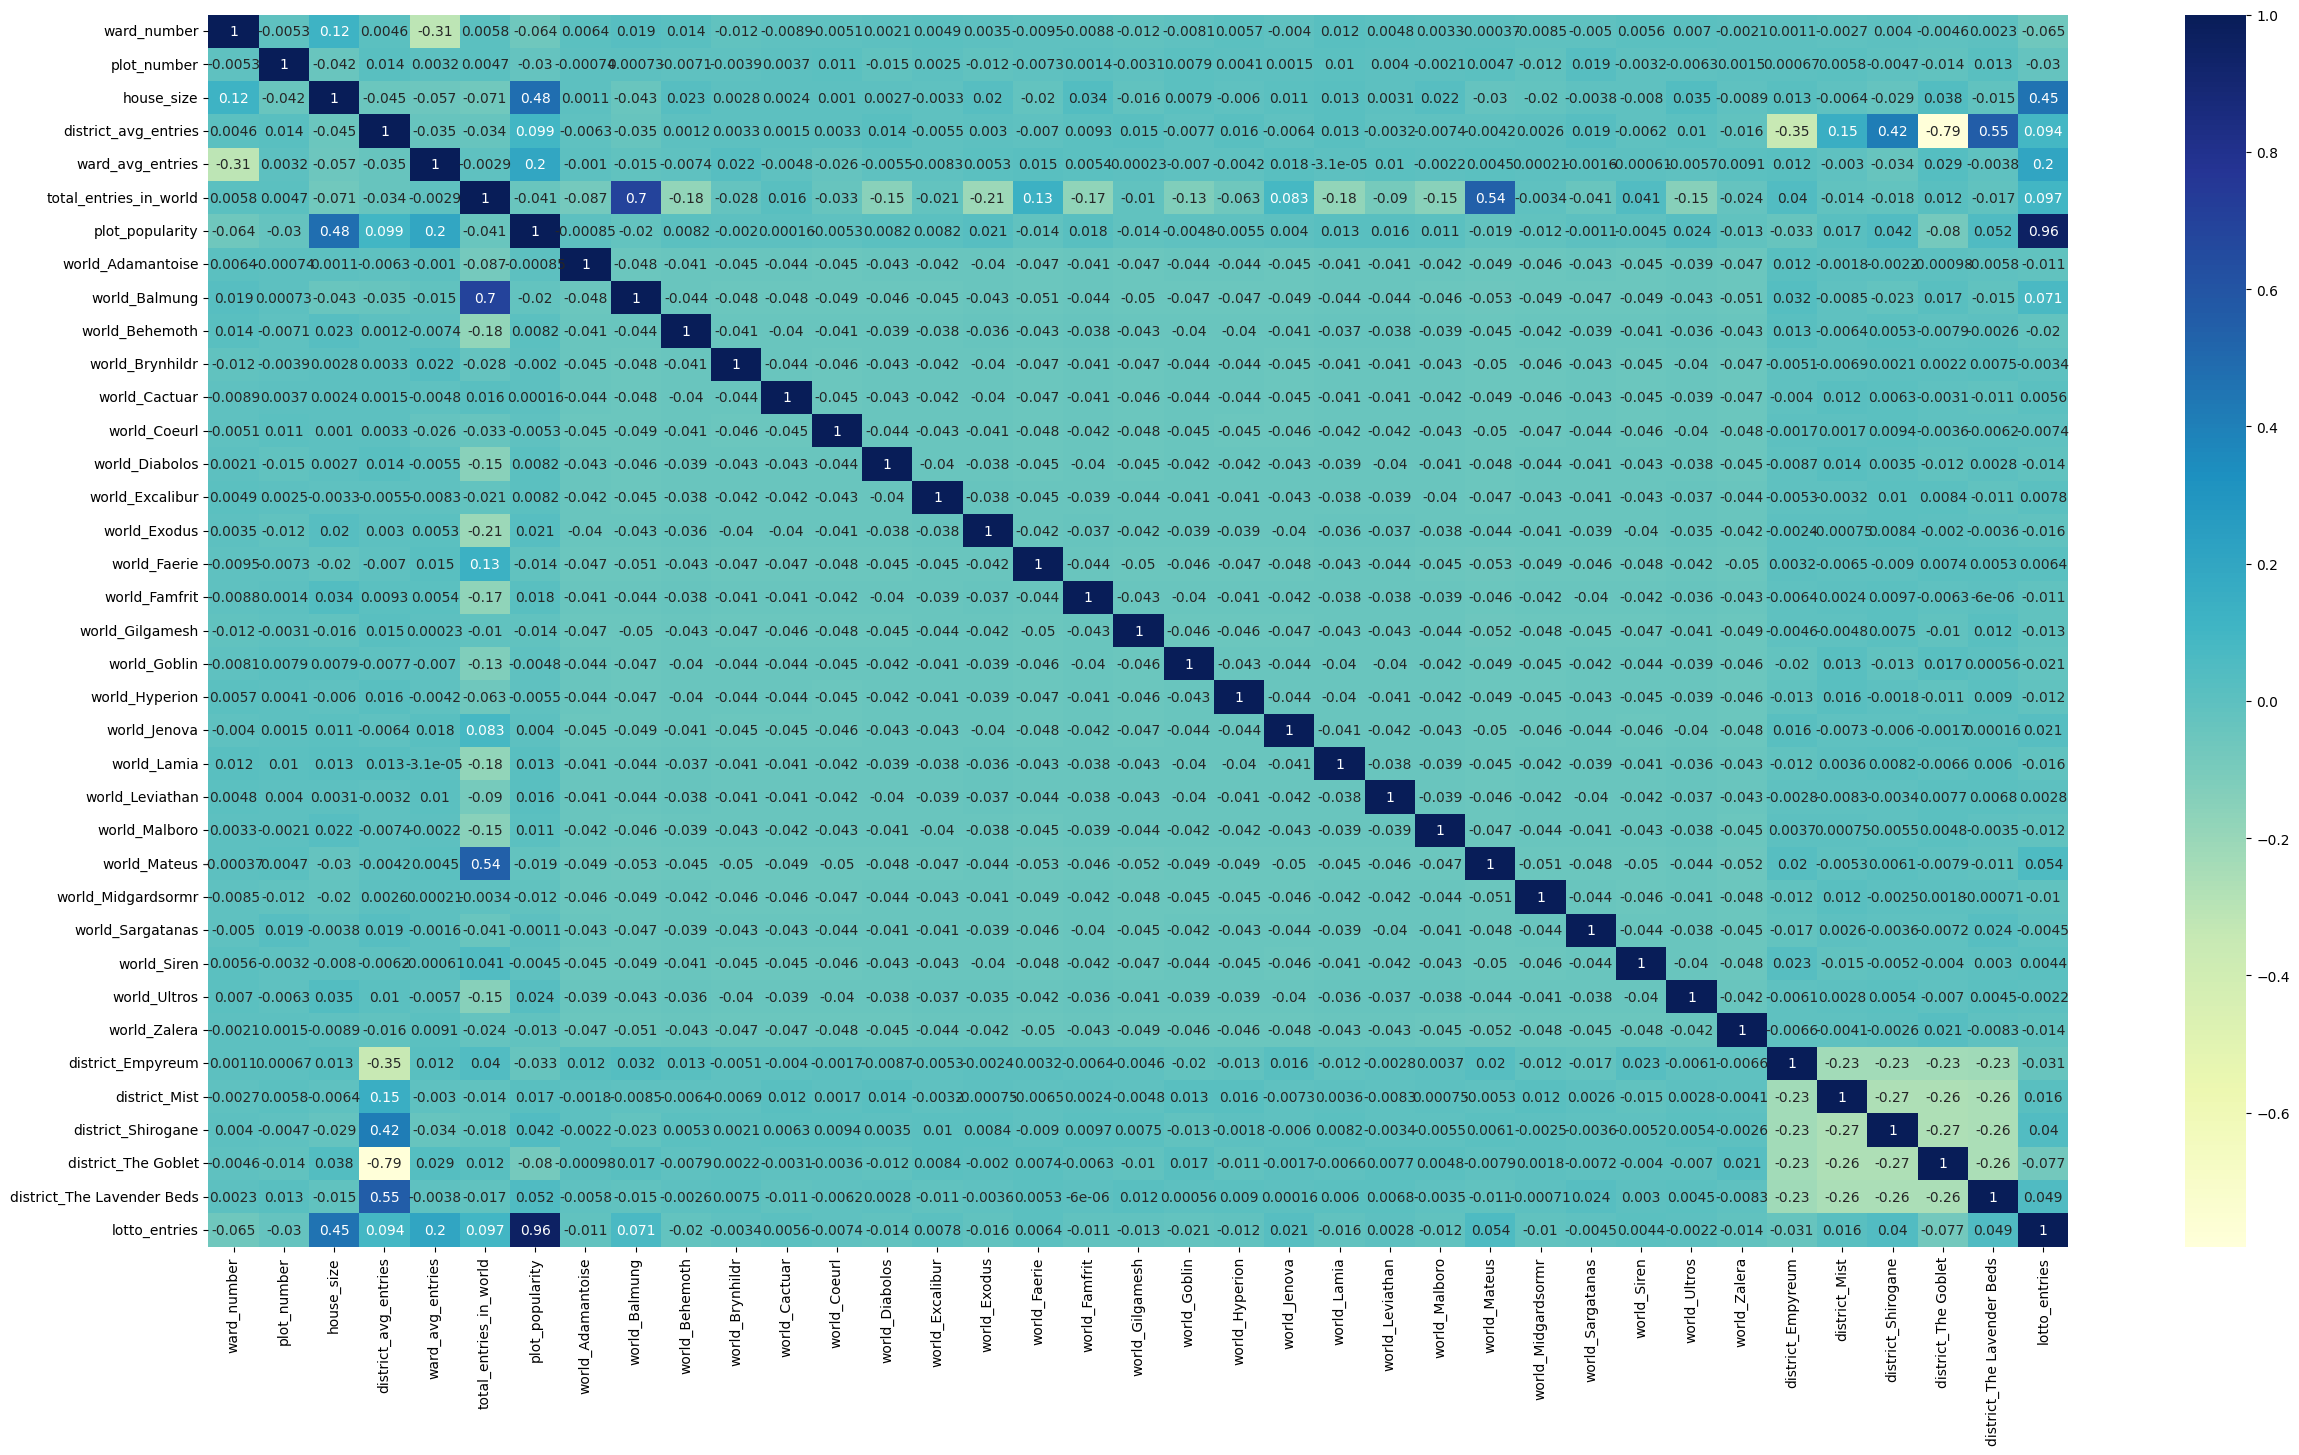

In [21]:
plt.figure(figsize=(30,16))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [142]:
#Setting to a Regression Model and calculating score
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9086310384066842

In [27]:
lotto_prediction = model.predict(X_test)
lotto_prediction

array([  3.83173004,   1.26013587,   3.25500462, ..., 151.4060402 ,
        81.04637573,   4.56729173], shape=(42703,))

In [3]:
import joblib

In [143]:
joblib.dump(model, "housing_predictor1.pkl")

['housing_predictor1.pkl']

In [50]:
loaded_model = joblib.load("housing_predictor.pkl")

In [31]:
loaded_model

LinearRegression()

In [10]:
dataframe

,world,district,ward_number,plot_number,house_size,lotto_entries,total_entries_per_ward
0,Goblin,The Goblet,21,8,2,29,46648
1,Exodus,Shirogane,7,6,1,6,44371
2,Goblin,Shirogane,14,49,2,93,42769
3,Lamia,Mist,8,59,2,62,40044
4,Malboro,The Lavender Beds,30,55,1,10,57018
...,...,...,...,...,...,...,...
85401,Lamia,The Goblet,24,8,2,4,49242
85402,Behemoth,Empyreum,2,50,1,1,16866
85403,Behemoth,Empyreum,6,39,1,1,16048
85404,Behemoth,Empyreum,6,34,1,1,16048


In [144]:
dataframe = dataframe.drop(["district_avg_entries"], axis = 1) 
dataframe = dataframe.drop(["ward_avg_entries"], axis = 1)
dataframe

,world,district,ward_number,plot_number,house_size,lotto_entries,total_entries_in_world,plot_popularity
0,Goblin,The Goblet,21,8,2,29.0,36110.0,0.803102
1,Exodus,Shirogane,7,6,1,6.0,27929.0,0.214830
2,Goblin,Shirogane,14,49,2,93.0,36110.0,2.575464
3,Lamia,Mist,8,59,2,62.0,30002.0,2.066529
4,Malboro,The Lavender Beds,30,55,1,10.0,33474.0,0.298739
...,...,...,...,...,...,...,...,...
52112,Diabolos,Mist,25,47,1,1.0,33855.0,0.029538
52113,Behemoth,Empyreum,2,50,1,1.0,29978.0,0.033358
52114,Behemoth,Empyreum,6,39,1,1.0,29978.0,0.033358
52115,Behemoth,Empyreum,6,34,1,1.0,29978.0,0.033358


In [145]:
dataframe = dataframe.drop(["house_size"], axis = 1)
dataframe = dataframe.drop(["lotto_entries"], axis = 1)
dataframe = dataframe.drop(["total_entries_in_world"], axis = 1)
dataframe

,world,district,ward_number,plot_number,plot_popularity
0,Goblin,The Goblet,21,8,0.803102
1,Exodus,Shirogane,7,6,0.214830
2,Goblin,Shirogane,14,49,2.575464
3,Lamia,Mist,8,59,2.066529
4,Malboro,The Lavender Beds,30,55,0.298739
...,...,...,...,...,...
52112,Diabolos,Mist,25,47,0.029538
52113,Behemoth,Empyreum,2,50,0.033358
52114,Behemoth,Empyreum,6,39,0.033358
52115,Behemoth,Empyreum,6,34,0.033358


In [151]:
joblib.dump(dataframe, "dataframe1.csv")

['dataframe1.csv']

In [4]:
dataframe = joblib.load("dataframe1.csv")
dataframe

,world,district,ward_number,plot_number,plot_popularity
0,Goblin,The Goblet,21,8,0.803102
1,Exodus,Shirogane,7,6,0.214830
2,Goblin,Shirogane,14,49,2.575464
3,Lamia,Mist,8,59,2.066529
4,Malboro,The Lavender Beds,30,55,0.298739
...,...,...,...,...,...
52112,Diabolos,Mist,25,47,0.029538
52113,Behemoth,Empyreum,2,50,0.033358
52114,Behemoth,Empyreum,6,39,0.033358
52115,Behemoth,Empyreum,6,34,0.033358


In [148]:
dataframe

,world,district,ward_number,plot_number,plot_popularity
0,Goblin,The Goblet,21,8,0.803102
1,Exodus,Shirogane,7,6,0.214830
2,Goblin,Shirogane,14,49,2.575464
3,Lamia,Mist,8,59,2.066529
4,Malboro,The Lavender Beds,30,55,0.298739
...,...,...,...,...,...
52112,Diabolos,Mist,25,47,0.029538
52113,Behemoth,Empyreum,2,50,0.033358
52114,Behemoth,Empyreum,6,39,0.033358
52115,Behemoth,Empyreum,6,34,0.033358


In [4]:
cleaned_df=pandas.read_csv('cleaned_housing_data.csv')

In [5]:
joblib.dump(cleaned_df, "df_with_entries.csv")

['df_with_entries.csv']

In [6]:
cleaned_df

,world,district,ward_number,plot_number,house_size,lotto_entries,district_avg_entries,ward_avg_entries,total_entries_in_world,plot_popularity
0,Goblin,The Goblet,21,8,2,29,13.346405,21.801226,36110,0.000803
1,Exodus,Shirogane,7,6,1,6,22.791391,22.482856,27929,0.000215
2,Goblin,Shirogane,14,49,2,93,22.791391,21.665345,36110,0.002575
3,Lamia,Mist,8,59,2,62,21.075564,19.513425,30002,0.002067
4,Malboro,The Lavender Beds,30,55,1,10,24.330882,29.309348,33474,0.000299
...,...,...,...,...,...,...,...,...,...,...
52112,Diabolos,Mist,25,47,1,1,21.075564,2.699507,33855,0.000029
52113,Behemoth,Empyreum,2,50,1,1,16.863208,8.983986,29978,0.000033
52114,Behemoth,Empyreum,6,39,1,1,16.863208,10.177931,29978,0.000033
52115,Behemoth,Empyreum,6,34,1,1,16.863208,10.177931,29978,0.000033
